
ypred for k=3


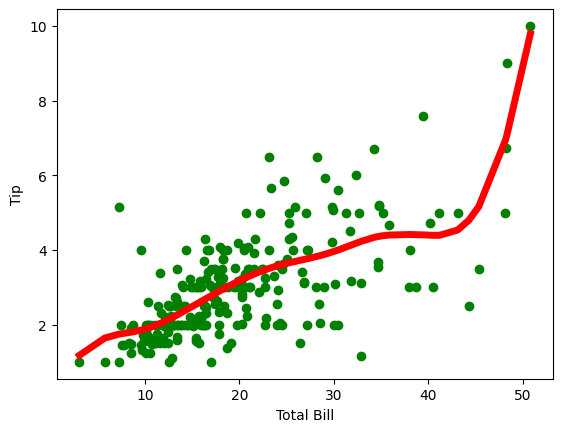


ypred for k=9


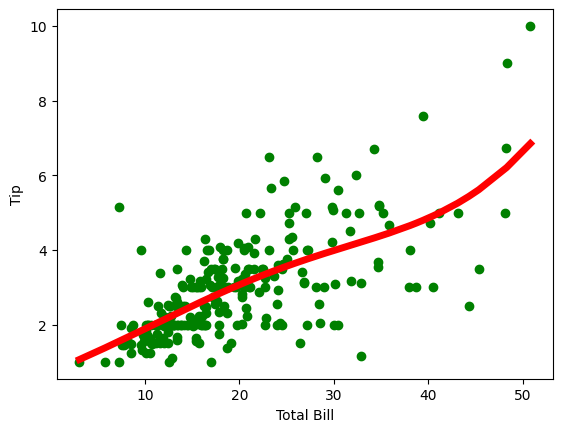

In [4]:
# Local Regression Algorithm

import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

data = pd.read_csv('Tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
X = np.hstack((np.mat(np.ones(np.shape(mbill)[1])).T,mbill.T))

def localWeight(point,xmat,ymat,k):
    rows,cols = np.shape(xmat)
    weights = np.mat(np.eye(rows))
    for i in range(rows):
        diff = point - X[i]
        weights[i,i] = np.exp(diff*diff.T/(-2.0*k**2))
    W = (X.T*(weights*X)).I*(X.T*(weights*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    rows,cols = np.shape(xmat)
    ypred = np.zeros(rows)
    for i in range(rows):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0)
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip,color='green')
    ax.plot(xsort[:,1],ypred[sortindex],color='red',linewidth=5)
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.show()

print('\nypred for k=3')
ypred = localWeightRegression(X,mtip,3)
graphPlot(X,ypred)

print('\nypred for k=9')
ypred = localWeightRegression(X,mtip,9)
graphPlot(X,ypred)
    